## Br11 Function

In [26]:
#Import tools
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = splot.apStarWavegrid()

In [44]:
help(splot)

Help on module apogee.spec.plot in apogee.spec:

NAME
    apogee.spec.plot

FILE
    //anaconda/lib/python2.7/site-packages/apogee-1.-py2.7.egg/apogee/spec/plot.py

DESCRIPTION
    ###############################################################################
    # apogee.spec.plot: various way to plot APOGEE spectra
    ###############################################################################

FUNCTIONS
    apStarWavegrid()
    
    detector(*args, **kwargs)
        NAME:
           detector
        PURPOSE:
           plot the spectrum from one of the detectors
        INPUT:
           Either:
              (a) wavelength, spectrum (\AA,spectrum units)
              (b) spectrum (assumed on standard APOGEE re-sampled wavelength grid)
              (c) location ID, APOGEE ID (default loads aspcapStar, loads extension ext(=1); apStar=True loads apStar spectrum)
           +'blue', 'green', 'red' to pick the detector
        KEYWORDS:
           apogee.spec.plot.waveregions keyw

In [27]:
#Input 2M number and find associated 4 digit ID

In [28]:
#Use the ID to find the right .fits file

In [29]:
#Calculate number of visits

In [30]:
#Read in APOGEE Spectrum
visit1 = 1
spec1= apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[1 + visit1]

In [31]:
#Plot all visits and zoom in around Br11

In [32]:
#Average all visits together

In [33]:
#Find peak of shifted Br11 emission

In [34]:
#Calculate Fc
lsum= np.sum(spec1[7545:7590])/ len(spec1[7545:7590])
rsum = np.sum(spec1[7719:7762])/len(spec1[7719:7762])
Fc= (lsum+rsum)/2

In [38]:
#Calculate Equivalent Width
EqW=0
for i in range(7590,7719):
    summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
    EqW = EqW + summ
EqW = abs(EqW/Fc)
EqW

10.407295930781205

In [39]:
upper = Lambda[7650]+(EqW/2)
lower = Lambda[7650]-(EqW/2)

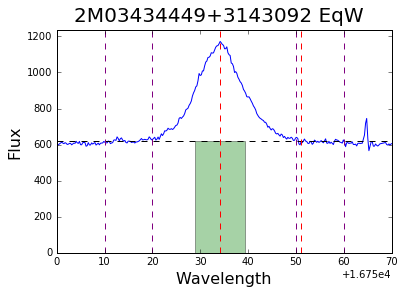

In [43]:
#Plot averaged spectrum with EqW
fig = plt.figure()
plt.plot(Lambda,spec1)
plt.axhline(y=Fc,ls='dashed',color='black')
plt.axvline(x=16760,ls='dashed',color='purple')
plt.axvline(x=16770,ls='dashed',color='purple')
plt.axvline(x=16800,ls='dashed',color='purple')
plt.axvline(x=16810,ls='dashed',color='purple')
plt.axvline(x=Lambda[7650],ls='dashed',color='r')
plt.axvline(x=16801,ls='dashed',color='r')
plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='g',alpha=0.35)
fig.suptitle('2M03434449+3143092 EqW', fontsize=20)
plt.xlabel('Wavelength', fontsize=16)
plt.ylabel('Flux', fontsize=16)
plt.xlim([16750,16820])
plt.ylim([0,Fc*2])
plt.savefig('EqW Test_better.pdf',bbox_inches='tight')